---
# **STEP 1: Importing Libaries**
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

---
# **STEP 2: Loading and Printing Colum in Dataset**
---

In [2]:
 #Load the dataset
data = pd.read_csv('Predict Student Dropout and Academic Success.csv', delimiter=';', quotechar='"')
#Print the colums
print(data.columns.tolist())

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


---
# **STEP 3: Spearting X and Y Features**
---

In [3]:
#Identify and separate features (X) and target (y)
target_column = 'Target'

if target_column in data.columns:
    y = data[target_column].copy()
    X = data.drop(columns=[target_column])
else:
    print(f"Error: '{target_column}' not found in dataset columns.")
    print("Please check the column names and update the target_column variable.")
    exit()

---
# **STEP 4: Removing Missing Values**
---

In [4]:
# Handle missing values
data.dropna(inplace=True)

---
# **STEP 5: Preprocessing the data**
---

In [5]:
# Preprocess the data
X = pd.get_dummies(X, drop_first=True)

---
# **STEP 6: Spliting Traring and Testing Sets**
---

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
# **STEP 7: Standardixing the data**
---

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
# **STEP 8: Logisting Reresssion and KNN Model**
---

In [8]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [9]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

---
# **STEP 9: Predictiong the models**
---

In [10]:
log_reg_preds = log_reg.predict(X_test_scaled)
knn_preds = knn.predict(X_test_scaled)

---
# **STEP 10: Classifition Report of the Models**
---

In [11]:
print("\nLogistic Regression Accuracy:")
print(accuracy_score(y_test, log_reg_preds))
print(classification_report(y_test, log_reg_preds))

print("\nK-Nearest Neighbors Accuracy:")
print(accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))


Logistic Regression Accuracy:
0.752542372881356
              precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885


K-Nearest Neighbors Accuracy:
0.7016949152542373
              precision    recall  f1-score   support

     Dropout       0.81      0.68      0.74       316
    Enrolled       0.37      0.28      0.32       151
    Graduate       0.72      0.87      0.79       418

    accuracy                           0.70       885
   macro avg       0.63      0.61      0.62       885
weighted avg       0.69      0.70      0.69       885



---
# **STEP 11: Evaluation Metrics of the Models**
---

In [12]:
metrics = {
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [accuracy_score(y_test, log_reg_preds), accuracy_score(y_test, knn_preds)],
    'Precision': [
        precision_score(y_test, log_reg_preds, average='weighted'),
        precision_score(y_test, knn_preds, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, log_reg_preds, average='weighted'),
        recall_score(y_test, knn_preds, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, log_reg_preds, average='weighted'),
        f1_score(y_test, knn_preds, average='weighted')
    ]
}
# Create a DataFrame
metrics_df = pd.DataFrame(metrics)

# Print the metrics
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.752542   0.734083  0.752542  0.736308
1                  KNN  0.701695   0.692702  0.701695  0.691230


---
# **STEP 12: Plot Comparison**
---

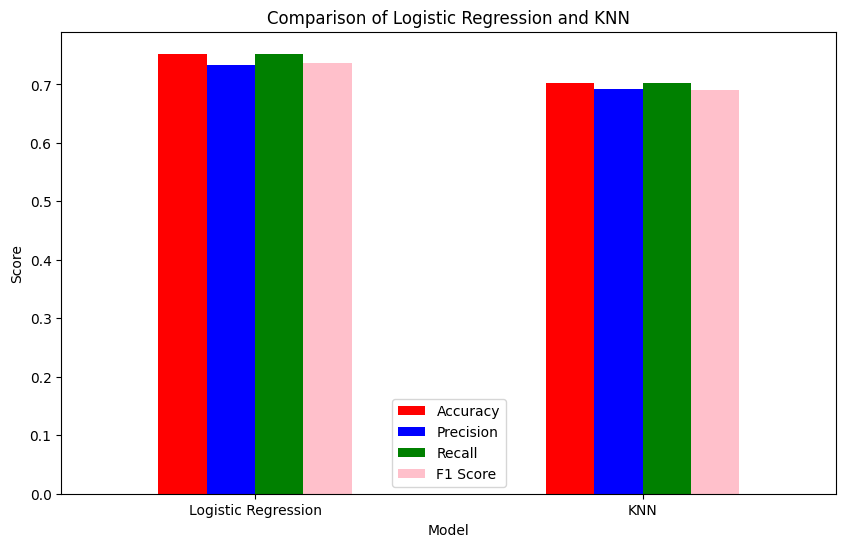

In [13]:
# comparison of accuracy, precision, recall, and F1 score
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'green', 'pink'])
plt.title('Comparison of Logistic Regression and KNN')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

---
# **STEP 13: Confusion Matrix**
---

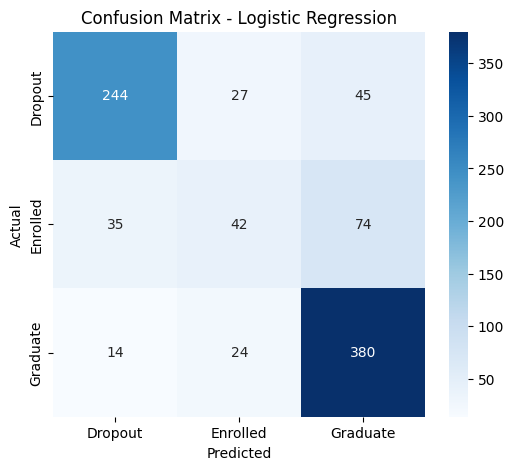

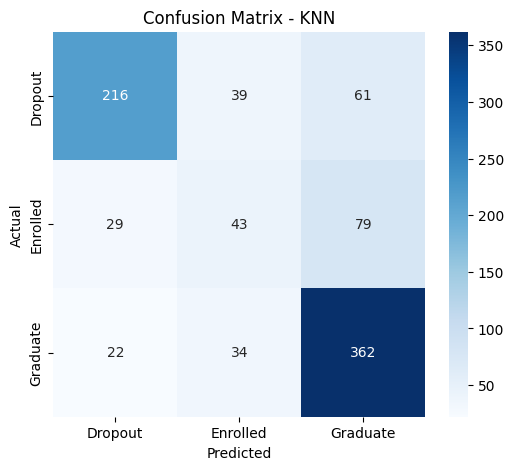

In [14]:
# Confusion Matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


---
# **STEP 14: Sample Data Prediction**
---



In [15]:
#Predict using sample data
sample_data = pd.DataFrame({
    'Marital status': [1],
    'Application mode': [17],
    'Application order': [5],
    'Course': [171],
    'Daytime/evening attendance': [1],
    'Previous qualification': [1],
    'Previous qualification (grade)': [122.0],
    'Nacionality': [1],
    "Mother's qualification": [19],
    "Father's qualification": [12],
    "Mother's occupation": [5],
    "Father's occupation": [9],
    'Admission grade': [127.3],
    'Displaced': [1],
    'Educational special needs': [0],
    'Debtor': [0],
    'Tuition fees up to date': [1],
    'Gender': [1],
    'Scholarship holder': [0],
    'Age at enrollment': [20],
    'International': [0],
    'Curricular units 1st sem (credited)': [0],
    'Curricular units 1st sem (enrolled)': [0],
    'Curricular units 1st sem (evaluations)': [0],
    'Curricular units 1st sem (approved)': [0],
    'Curricular units 1st sem (grade)': [0.0],
    'Curricular units 1st sem (without evaluations)': [0],
    'Curricular units 2nd sem (credited)': [0],
    'Curricular units 2nd sem (enrolled)': [0],
    'Curricular units 2nd sem (evaluations)': [0],
    'Curricular units 2nd sem (approved)': [0],
    'Curricular units 2nd sem (grade)': [0.0],
    'Curricular units 2nd sem (without evaluations)': [0],
    'Unemployment rate': [10.8],
    'Inflation rate': [1.4],
    'GDP': [1.74],
})

# Align sample data with training data
for col in X_train.columns:
    if col not in sample_data.columns:
        sample_data[col] = 0
sample_data = sample_data[X_train.columns]

# Scale the sample data
sample_data_scaled = scaler.transform(sample_data)

# Predict outcomes
log_reg_sample_pred = log_reg.predict(sample_data_scaled)
knn_sample_pred = knn.predict(sample_data_scaled)

# printing predictions
print("Logistic Regression Prediction:", log_reg_sample_pred[0])
print("KNN Prediction:", knn_sample_pred[0])

Logistic Regression Prediction: Dropout
KNN Prediction: Graduate
